### Loading and cleaning data

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# using encoding = "ISO-8859-1" to avoid pandas encoding error
funding_rounds = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")
companies = pd.read_csv("companies.txt", sep="\t", encoding = "ISO-8859-1")

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
5,/Organization/01Games-Technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
6,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
7,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,/Organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
9,/Organization/1-2-3-Listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012


### Checking how the dataframes look like for the funding rounds and the companies

In [6]:
#funding rounds
print(funding_rounds.head())

#shape
print(funding_rounds.shape)

#info
print(funding_rounds.info(), "\n")

                     company_permalink  \
0                  /organization/-fame   
1               /ORGANIZATION/-QOUNTER   
2               /organization/-qounter   
3  /ORGANIZATION/-THE-ONE-OF-THEM-INC-   
4                /organization/0-6-com   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
2  /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3  /funding-round/650b8f704416801069bb178a1418776b            venture   
4  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   

  funding_round_code   funded_at  raised_amount_usd  
0                  B  05-01-2015         10000000.0  
1                  A  14-10-2014                NaN  
2                NaN  01-03-2014           700000.0  
3                  B  30-01-2014          3406878.0  
4                  A  19-03-2008      

In [7]:
#companies
print(companies.head())

#shape
print(companies.shape)

#info
print(companies.info(), "\n")

                             permalink                    name  \
0                  /Organization/-Fame                   #fame   
1               /Organization/-Qounter                :Qounter   
2  /Organization/-The-One-Of-Them-Inc-  (THE) ONE of THEM,Inc.   
3                /Organization/0-6-Com                 0-6.com   
4       /Organization/004-Technologies        004 Technologies   

                        homepage_url  \
0                 http://livfame.com   
1             http://www.qounter.com   
2                http://oneofthem.jp   
3                 http://www.0-6.com   
4  http://004gmbh.de/en/004-interact   

                                       category_list     status country_code  \
0                                              Media  operating          IND   
1  Application Platforms|Real Time|Social Network...  operating          USA   
2                                  Apps|Games|Mobile  operating          NaN   
3                                        C

### both have quite a few missing values so lets proceed to do some cleanup

In [8]:
#the permalinks should be common in both of the dataframes which would make them a good unique-key
# confirming that the permalinks are common in both of the dfs
len(companies.permalink.unique())

66368

In [13]:
len(funding_rounds.company_permalink.unique())

90247

In [14]:
#converting permalinks to lc
companies['permalink'] = companies['permalink'].str.lower()
print(companies.head())

funding_rounds['company_permalink'] = funding_rounds['company_permalink'].str.lower()
print(funding_rounds.head())

                             permalink                    name  \
0                  /organization/-fame                   #fame   
1               /organization/-qounter                :Qounter   
2  /organization/-the-one-of-them-inc-  (THE) ONE of THEM,Inc.   
3                /organization/0-6-com                 0-6.com   
4       /organization/004-technologies        004 Technologies   

                        homepage_url  \
0                 http://livfame.com   
1             http://www.qounter.com   
2                http://oneofthem.jp   
3                 http://www.0-6.com   
4  http://004gmbh.de/en/004-interact   

                                       category_list     status country_code  \
0                                              Media  operating          IND   
1  Application Platforms|Real Time|Social Network...  operating          USA   
2                                  Apps|Games|Mobile  operating          NaN   
3                                        C

In [16]:
#recheck unique values
print(len(companies.permalink.unique()))

print(len(funding_rounds.company_permalink.unique()))

66368
66370


### There is only a difference of 2 permalinks between the companies df and the funding df

### Checking permalinks found in funding that are not in companies

In [18]:
# companies present in rounds file but not in (~) companies file
funding_rounds.loc[~funding_rounds['company_permalink'].isin(companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


### Checking for the existence of characters in the permalinks that are not from english language

In [19]:
funding_rounds_original = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")
funding_rounds_original.iloc[[29597, 31863, 45176, 58473], :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/ORGANIZATION/E-CÃBICA,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/ORGANIZATION/ENERGYSTONE-GAMES-ÇµÇ³Æ¸¸Æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/ORGANIZATION/MAGNET-TECH-Ç£Ç³Ç§Æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0


### Checking if the odd characters are a product of the type of encoding

In [20]:
import chardet

rawdata = open('rounds2.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

print(result)

Windows-1254
{'encoding': 'Windows-1254', 'confidence': 0.4186155476629225, 'language': 'Turkish'}


### Using pandas to test different types of encoding 


In [22]:
funding_rounds['company_permalink'] = funding_rounds.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
funding_rounds.loc[~funding_rounds['company_permalink'].isin(companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
77,/organization/10north,/funding-round/b41ff7de932f8b6e5bbeed3966c0ed6a,equity_crowdfunding,NaN,12-08-2014,NaN
729,/organization/51wofang-,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,A,06-07-2015,5000000.0
2670,/organization/adslinked,/funding-round/449ae54bb63c768c232955ca6911dee4,seed,NaN,29-09-2014,100000.0
3166,/organization/aesthetic-everything-social-network,/funding-round/62593455f1a69857ed05d5734cc04132,equity_crowdfunding,NaN,12-10-2014,NaN
3291,/organization/affluent-attach-club-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,NaN,15-10-2014,100000.0
4568,/organization/allgu-outlet,/funding-round/49e8a9b54ed19c8505ca92dc031a8e9c,venture,NaN,17-03-2015,1400000.0
8097,/organization/asiansbook,/funding-round/3f243ab92b4fe397d41b4734a17ca5f0,seed,NaN,15-09-2014,100000.0
8652,/organization/atlye-gri,/funding-round/75bdeacd95a647108aa4bc480e77894d,grant,NaN,01-11-2012,13940.0
9784,/organization/axgaz,/funding-round/511a41181aaf193bbd419babfb8d66e9,venture,NaN,06-07-2015,4094392.0
14311,/organization/boral-bikes-incorporated,/funding-round/be79575bf4b5b5d6fa64670800a3ca5e,seed,NaN,26-02-2015,NaN


### After dealing with encoding recheck unique values

In [23]:
len(funding_rounds.company_permalink.unique())

66368

### And there it is funding and companies df now have the same number of unique values, it was probably just the encoding issue

### Doing the same thing for the companies dataframe

In [25]:
companies.loc[~companies['permalink'].isin(funding_rounds['company_permalink']), :]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
43,/organization/10â°north,10Â°North,NaN,Fashion,operating,CAN,ON,Toronto,Mississauga,05-01-2013
426,/organization/51wofang-æ å¿§ææ¿,51wofang æ å¿§ææ¿,http://www.51wofang.com,NaN,closed,NaN,NaN,NaN,NaN,01-01-2014
1506,/organization/adslinkedâ¢,AdsLinkedâ¢,http://www.adslinked.com,Advertising|Internet,operating,NaN,NaN,NaN,NaN,NaN
1775,/organization/aesthetic-everythingâ®-social-ne...,Aesthetic EverythingÂ® Social Network,http://aestheticeverything.com/,Public Relations,operating,USA,CA,Los Angeles,Marina Del Rey,15-06-2009
1834,/organization/affluent-attachã©-club-2,Affluent AttachÃ© Club,http://www.affluentattache.com/,Hospitality,operating,USA,CA,Los Angeles,Beverly Hills,NaN
2556,/organization/allgã¤u-outlet,AllgÃ¤u Outlet,http://allgaeuoutlet.de/,Fashion,operating,DEU,2,DEU - Other,Sonthofen,NaN
4567,/organization/asiansbookâ¢,Asiansbookâ¢,http://www.asiansbook.com,Social Media|Social Network Media,operating,NaN,NaN,NaN,NaN,NaN
4903,/organization/atã¶lye-gri,AtÃ¶lye Gri,http://www.atolyegri.com/,Advertising,operating,NaN,NaN,NaN,NaN,NaN
5490,/organization/axã¨gaz,AxÃ¨gaz,http://www.axegaz.com/,Energy,operating,FRA,A8,Paris,Levallois-perret,01-01-2012
8131,/organization/borã©al-bikes-incorporated,BorÃ©al Bikes Incorporated,http://www.borealbikes.com,Automotive|Design|Manufacturing,operating,DEU,16,Berlin,Berlin,01-01-2014


In [26]:
#remove encoding
companies['permalink'] = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

In [27]:
# companies present in companies df but not in rounds df
companies.loc[~companies['permalink'].isin(funding_rounds['company_permalink']), :]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


### Both are clear of the encoding issues

### saving the cleared up data into their own files

In [28]:
funding_rounds.to_csv("rounds_clean.csv", sep=',', index=False)


companies.to_csv("companies_clean.csv", sep='\t', index=False)

## Dealing with missing values

In [33]:
#checking number of missing values
print("_______________COMPANIES_______________")
print(companies.isnull().sum())
print("_______________FUNDING_______________")
print(funding_rounds.isnull().sum())

_______________COMPANIES_______________
permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64
_______________FUNDING_______________
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64


### Permalink in both seems to not be missing anything so lets go ahead and merge them based on the permalink

In [36]:
merged_df = pd.merge(companies, funding_rounds, how="inner", left_on="permalink", right_on="company_permalink")
merged_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [37]:
# removing redundant columns
merged_df =  merged_df.drop(['company_permalink'], axis=1) 

In [38]:
# look at columns after dropping
merged_df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'funding_round_permalink', 'funding_round_type', 'funding_round_code',
       'funded_at', 'raised_amount_usd'],
      dtype='object')

### Checking if there are missing values in the merged df

In [39]:
merged_df.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

### fractioning the missing values

In [40]:
round(100*(merged_df.isnull().sum()/len(merged_df.index)), 2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

### removing the columns that have missing values over 10% and the regional related columns since they are not needed

### since we have the permalink columns we will also be discarding the homepage_url columns

In [41]:
merged_df = merged_df.drop(['funding_round_code', 'homepage_url', 'founded_at', 'state_code', 'region', 'city'], axis=1)
merged_df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


### Rechecking missing fractions

In [42]:
round(100*(merged_df.isnull().sum()/len(merged_df.index)), 2)

permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

### Raised amount is extremely important so let's try to deal with the missing values in a sensible way

In [43]:
merged_df['raised_amount_usd'].describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

### Mean at 10 million
### Median at 1 milliom
### Min and Max are 7 figures apart

### there is a very large spread in the data

In [44]:
merged_df = merged_df[~np.isnan(merged_df['raised_amount_usd'])]
round(100*(merged_df.isnull().sum()/len(merged_df.index)), 2)

permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

### Turning country code into a category

In [45]:
country_codes = merged_df['country_code'].astype('category')

# displaying frequencies of each category
country_codes.value_counts()

USA    62049
GBR     5019
CAN     2616
CHN     1927
IND     1649
FRA     1451
ISR     1364
ESP     1074
DEU     1042
AUS      649
RUS      588
IRL      563
SWE      560
SGP      546
NLD      532
JPN      485
ITA      483
BRA      483
CHE      437
KOR      432
CHL      432
FIN      382
DNK      314
ARG      297
BEL      293
HKG      250
TUR      196
NOR      191
BGR      190
MEX      189
       ...  
KHM        2
DOM        2
MAR        2
MAF        2
KWT        2
NIC        2
ZMB        2
KAZ        2
TUN        2
SOM        1
SYC        1
SEN        1
TGO        1
QAT        1
UZB        1
PSE        1
PRY        1
OMN        1
DMA        1
BLM        1
MNE        1
MKD        1
BRB        1
LAO        1
IRN        1
HND        1
GRD        1
GGY        1
DZA        1
KNA        1
Name: country_code, Length: 134, dtype: int64

### Fractioning country codes, for better visualization will drop the countries with less than 1% investment

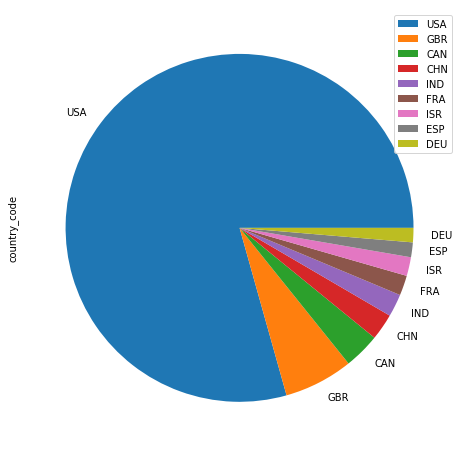

In [71]:
import matplotlib.pyplot as plt
fractions = 100*(merged_df['country_code'].value_counts()/len(merged_df.index))

country_code_df = pd.DataFrame(data = fractions)

#dropping the countries with less than 1% investment
country_code_df = country_code_df[country_code_df['country_code'] > 1]

country_code_df.plot.pie(y = 'country_code', figsize=(8, 8))


### USA, GBR and CAN are the countries with greater investment numbers

### removing the rows missing the country code

In [73]:
# removing rows with missing country_codes
merged_df = merged_df[~pd.isnull(merged_df['country_code'])]

# look at missing values
round(100*(merged_df.isnull().sum()/len(merged_df.index)), 2)

permalink                  0.00
name                       0.00
category_list              0.65
status                     0.00
country_code               0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

### Category list still has some missing values, I will remove those

In [74]:
# removing rows with missing category_list values
merged_df = merged_df[~pd.isnull(merged_df['category_list'])]

# look at missing values
round(100*(merged_df.isnull().sum()/len(merged_df.index)), 2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

### Filtering the dataframe based on funding types

In [75]:
merged_df = merged_df[(merged_df.funding_round_type == "venture") | 
        (merged_df.funding_round_type == "angel") | 
        (merged_df.funding_round_type == "seed") | 
        (merged_df.funding_round_type == "private_equity") ]

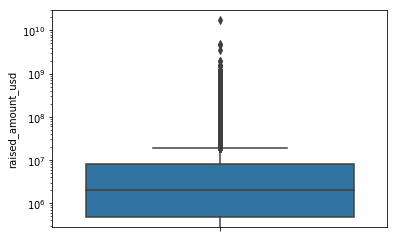

In [77]:
# distribution of raised_amount_usd
sns.boxplot(y=merged_df['raised_amount_usd'])
plt.yscale('log')
plt.show()

In [78]:
# summary metrics
merged_df['raised_amount_usd'].describe()

count    7.512400e+04
mean     9.519475e+06
std      7.792778e+07
min      0.000000e+00
25%      4.705852e+05
50%      2.000000e+06
75%      8.000000e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

### the mean and the median (50%) are very far apart (9.5 million to 2 million)

### checking the difference accross the categories

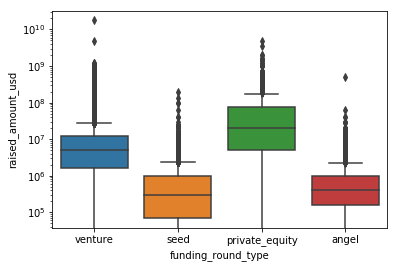

In [80]:
# comparing summary stats across four categories
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=merged_df)
plt.yscale('log')
plt.show()

In [82]:
# compare the mean and median values across categories
merged_df.pivot_table(values='raised_amount_usd', columns='funding_round_type', aggfunc=[np.median, np.mean])

median                                      \
funding_round_type     angel private_equity      seed    venture   
raised_amount_usd   414906.0     20000000.0  300000.0  5000000.0   

                             mean                                              
funding_round_type          angel private_equity           seed       venture  
raised_amount_usd   971573.891136   7.393849e+07  747793.682484  1.172422e+07

### there is still a bog difference between median and mean wich means thta there might be a few extreme values skewing the statistics 

### lets stick with the median

In [84]:
# compare the median investment amount across the types
merged_df.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               414906.0
seed                300000.0
Name: raised_amount_usd, dtype: float64

### Country Analysis

### Venture funcing seems to be he middle ground between them 

### Compare venture vs  total

In [87]:
# filter the df for private equity type investments
merged_df = merged_df[merged_df.funding_round_type=="venture"]

# group by country codes and compare the total funding amounts
country_wise_total = merged_df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
print(country_wise_total)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
SWE    3.145857e+09
NLD    2.903876e+09
CHE    2.801560e+09
SGP    2.793918e+09
ESP    1.827622e+09
BRA    1.785818e+09
IRL    1.669286e+09
RUS    1.570426e+09
AUS    1.319029e+09
DNK    1.228311e+09
FIN    1.043200e+09
BEL    1.030840e+09
NOR    9.536361e+08
KOR    8.919883e+08
MYS    8.830588e+08
HKG    7.812670e+08
TWN    6.239795e+08
AUT    5.833607e+08
TUR    5.590975e+08
ITA    4.882894e+08
NZL    4.483164e+08
           ...     
KWT    1.400000e+07
LIE    1.309172e+07
MNE    1.220000e+07
SVN    1.201751e+07
BGR    1.130000e+07
KAZ    1.100000e+07
GRC    1.074378e+07
BAH    8.900000e+06
TTO    8.500000e+06
SVK    8.241062e+06
BGD    7.002000e+06
LBN    6.455000e+06
GGY    3.960000e+06
TUN    3.920000e+06
SEN    2.860000e+06
HRV    2.633669e+06
UGA    2.500000e+06
PER    2.469270e+06
BWA    

### Focus on the top 9 countries

In [88]:
# top 9 countries
top_9_countries = country_wise_total[:9]
top_9_countries

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

### USA, GBR and IND are the only english speaking in the top 9 so lets filter them

In [89]:
# filtering for the top three countries
merged_df = merged_df[(merged_df.country_code=='USA') | (merged_df.country_code=='GBR') | (merged_df.country_code=='IND')]
merged_df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0
22,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0


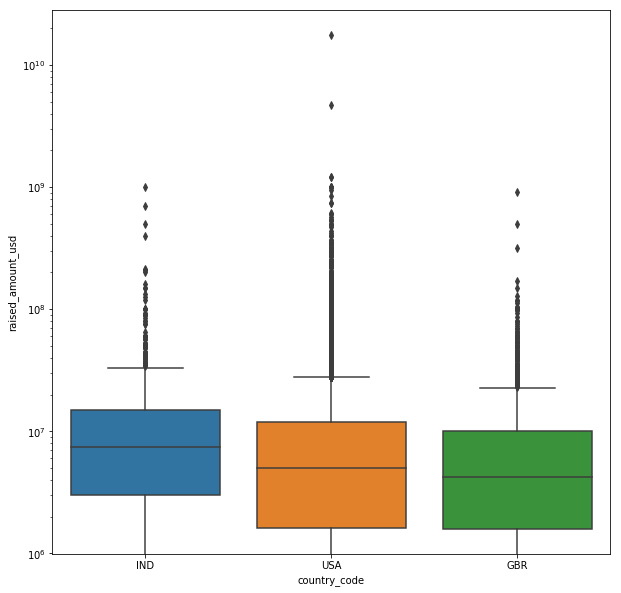

In [90]:
# boxplot to see distributions of funding amount across countries
plt.figure(figsize=(10, 10))
sns.boxplot(x='country_code', y='raised_amount_usd', data=merged_df)
plt.yscale('log')
plt.show()

### Selecting an investment sector

#### First, we need to extract the main sector using the column category_list. The category_list column contains values such as 'Biotechnology|Health Care' - in this, 'Biotechnology' is the 'main category' of the company, which we need to use.

#### Let's extract the main categories in a new column.